# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [Disaster Mapper data](https://knowledge.aidr.org.au/media/10009/disaster-mapper-data-21-03-2023.xlsx)

`imports`, you've seen this before!

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [57]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [58]:
plt.rcParams["figure.figsize"] = (10, 5)


In [59]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [60]:
# if os.path.isfile("disaster-mapper-data-21-03-2023.xlsx"):
#     filepath = "disaster-mapper-data-21-03-2023.xlsx"
#     print("loading from file")
# else:
#     filepath = "https://knowledge.aidr.org.au/media/10009/disaster-mapper-data-21-03-2023.xlsx"
#     print("loading from the internet")

filepath = "au-govt-agd-disaster-events-impact-location-na.csv"
disaster_data = pd.read_csv(filepath)
print("done")


done


In [61]:
disaster_data.startdate = disaster_data.startdate.str.replace("/", "-")
disaster_data.enddate = disaster_data.enddate.str.replace("/", "-")
disaster_data.head()


,FID,id,resourcetype,title,description,startdate,enddate,lat,lon,evacuated,...,businesses_damaged,businesses_destroyed,farms_damaged,farms_destroyed,crops_destroyed,livestock_destroyed,government_assistance,regions,url,the_geom
0,disaster_events_impact_location.fid-2393c2e0_1...,3,Disaster Event,Industrial - Appin Mine Explosion,On 24 July 1979 an explosion occurred in the u...,7-24-1979,7-24-1979,-34.192211,150.786331,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,http://www.emknowledge.gov.au/resource/?id=3,POINT (-34.19221115 150.7863312)
1,disaster_events_impact_location.fid-2393c2e0_1...,9,Disaster Event,Transport - Trawalla Train and Truck Collision,"On 28 April 2006, a V/Line passenger train bou...",4-28-2006,4-28-2006,-37.436260,143.469421,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=9,POINT (-37.43626022 143.4694214)
2,disaster_events_impact_location.fid-2393c2e0_1...,22,Disaster Event,Bushfire - Great Divide Complex,Victoria experienced a very adverse fire seaso...,12-01-2006,2-07-2007,-36.718010,147.145218,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=22,POINT (-36.71800995 147.1452179)
3,disaster_events_impact_location.fid-2393c2e0_1...,24,Disaster Event,Severe Storm - South-East Queensland and North...,"In early October 2007, severe storms brought a...",10-07-2007,10-12-2007,-28.805798,153.276871,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Queensland,http://www.emknowledge.gov.au/resource/?id=24,POINT (-28.80579758 153.2768707)
4,disaster_events_impact_location.fid-2393c2e0_1...,38,Disaster Event,Shipwreck - Vixen,The schooner Vixen was on voyage from Brisbane...,01-09-1847,01-09-1847,-29.334297,153.369141,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Queensland,http://www.emknowledge.gov.au/resource/?id=38,POINT (-29.33429718 153.3691406)


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [62]:
disaster_data.sample(5)


,FID,id,resourcetype,title,description,startdate,enddate,lat,lon,evacuated,...,businesses_damaged,businesses_destroyed,farms_damaged,farms_destroyed,crops_destroyed,livestock_destroyed,government_assistance,regions,url,the_geom
21,disaster_events_impact_location.fid-2393c2e0_1...,371,Disaster Event,Epidemic - Melbourne Food Poisoning 2003,"In the period 5 to 15 January 2003, 195 people...",1-05-2003,1-15-2003,-37.813244,144.962891,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=371,POINT (-37.81324387 144.9628906)
340,disaster_events_impact_location.fid-2393c2e0_1...,307,Disaster Event,Flood - Alice Springs and Central Northern Ter...,"Starting on 31 March 1988, the Todd River catc...",3-31-1988,4-02-1988,-23.493477,132.808227,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Territory,http://www.emknowledge.gov.au/resource/?id=307,POINT (-23.49347687 132.8082275)
308,disaster_events_impact_location.fid-2393c2e0_1...,274,Disaster Event,Urban Fire - Shepparton Factory Fire,A fire at the factory in Shepparton resulted i...,1-01-1963,1-01-1963,-36.348591,145.461823,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=274,POINT (-36.34859085 145.4618225)
248,disaster_events_impact_location.fid-2393c2e0_1...,212,Disaster Event,Flood - Brisbane River,"On 24 January 1974, torrential rain and record...",1-25-1974,1-29-1974,-27.471268,153.009171,2500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Queensland,http://www.emknowledge.gov.au/resource/?id=212,POINT (-27.4712677 153.0091705)
158,disaster_events_impact_location.fid-2393c2e0_1...,118,Disaster Event,Severe Storm - Illawarra and Sydney,"On the 31 August 1996, an East Coast Low creat...",8-31-1996,8-31-1996,-34.234230,150.919189,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,http://www.emknowledge.gov.au/resource/?id=118,POINT (-34.23423004 150.9191895)


We can also get the list of columns out of the data frame

In [63]:
disaster_data.columns

Index(['FID', 'id', 'resourcetype', 'title', 'description', 'startdate',
       'enddate', 'lat', 'lon', 'evacuated', 'homeless', 'injuries', 'deaths',
       'insured_cost', 'trains_damaged', 'trains_destroyed', 'homes_damaged',
       'homes_destroyed', 'buildings_damaged', 'buildings_destroyed',
       'ind_premises_destroyed', 'com_premises_damaged',
       'com_premises_destroyed', 'bridges_damaged', 'bridges_destroyed',
       'aircraft_damaged', 'aircraft_destroyed', 'motor_vehicles_damaged',
       'motor_vehicles_destroyed', 'water_vessels_damaged',
       'water_vessels_destroyed', 'businesses_damaged', 'businesses_destroyed',
       'farms_damaged', 'farms_destroyed', 'crops_destroyed',
       'livestock_destroyed', 'government_assistance', 'regions', 'url',
       'the_geom'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [64]:
row_one = disaster_data.iloc[1]
row_one


FID                         disaster_events_impact_location.fid-2393c2e0_1...
id                                                                          9
resourcetype                                                   Disaster Event
title                          Transport - Trawalla Train and Truck Collision
description                 On 28 April 2006, a V/Line passenger train bou...
startdate                                                           4-28-2006
enddate                                                             4-28-2006
lat                                                                 -37.43626
lon                                                                143.469421
evacuated                                                                 NaN
homeless                                                                  NaN
injuries                                                                 18.0
deaths                                                          

Series objects are _very_ similar to dictionaries. They have more properties though.

In [65]:
row_one.deaths

2.0

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [66]:
row_one.injuries

18.0

Doing the same thing on a dataframe gives us the whole column

In [67]:
disaster_data.deaths = disaster_data.deaths.fillna(0)
disaster_data.deaths

0      14.0
1       2.0
2       1.0
3       0.0
4       5.0
       ... 
668     0.0
669     0.0
670     0.0
671     0.0
672     5.0
Name: deaths, Length: 673, dtype: float64

<Axes: >

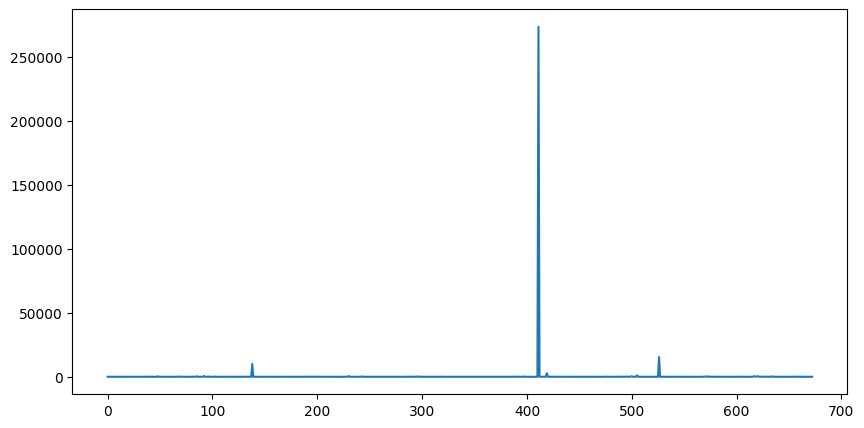

In [68]:
disaster_data.deaths.plot()

<Axes: >

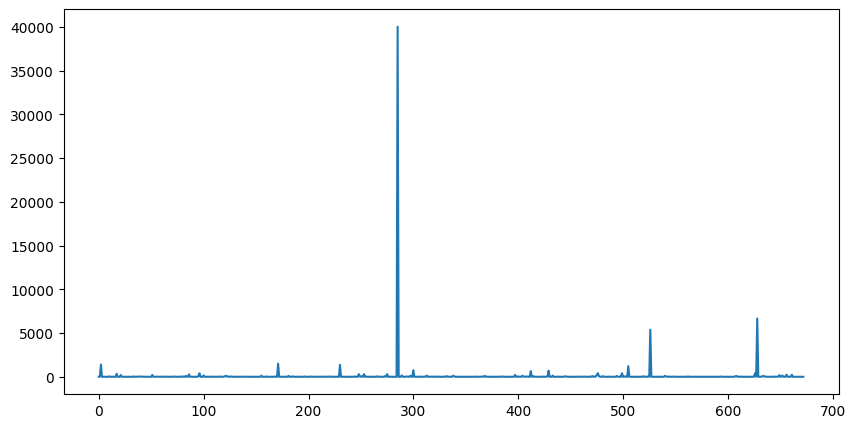

In [69]:
disaster_data.injuries = disaster_data.injuries.fillna(0)
disaster_data.injuries.plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

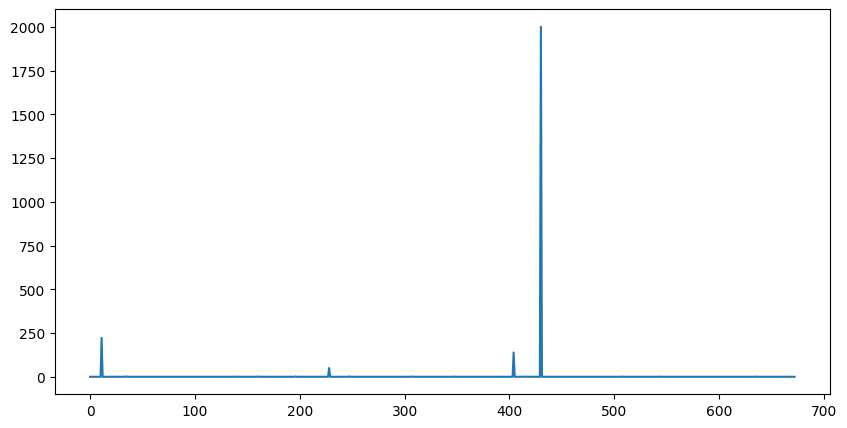

In [70]:
disaster_data.motor_vehicles_destroyed = disaster_data.motor_vehicles_destroyed.fillna(0)
disaster_data.motor_vehicles_destroyed.plot()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<Axes: >

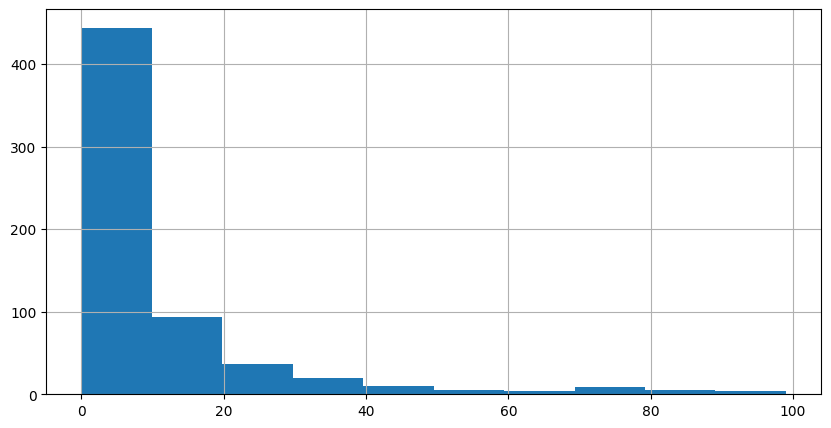

In [71]:
disaster_data.deaths[disaster_data.deaths < 100].hist()


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [72]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [73]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [74]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


0      0
1      1
2      2
3      3
97    97
98    98
99    99
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [75]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [76]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [77]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [78]:
[p.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT AND LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [79]:
[p for p in pets if len(p) == 4]


['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [80]:
[p.upper() for p in pets if len(p) == 5]


['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'All disaster events with deaths under 200')

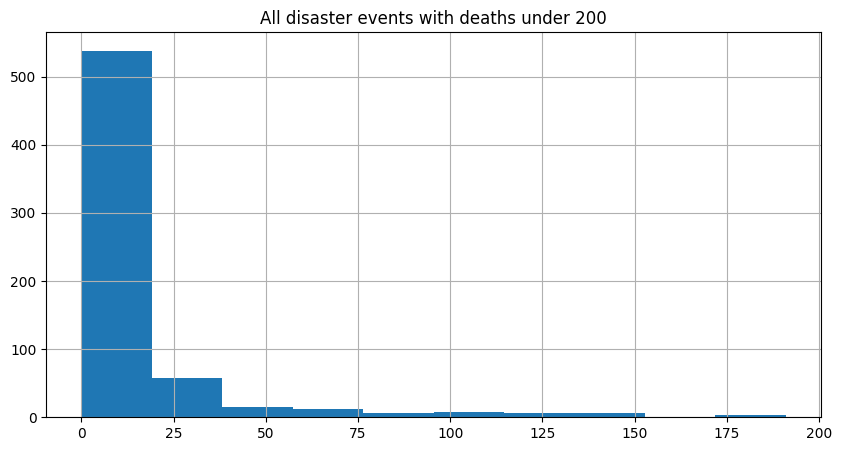

In [81]:
upper_bound = 200
disaster_data.deaths[disaster_data.deaths < upper_bound].hist()
plt.title(f"All disaster events with deaths under {upper_bound}")


Let's see what's under $1000

Text(0.5, 1.0, 'All disaster events with deaths under 50')

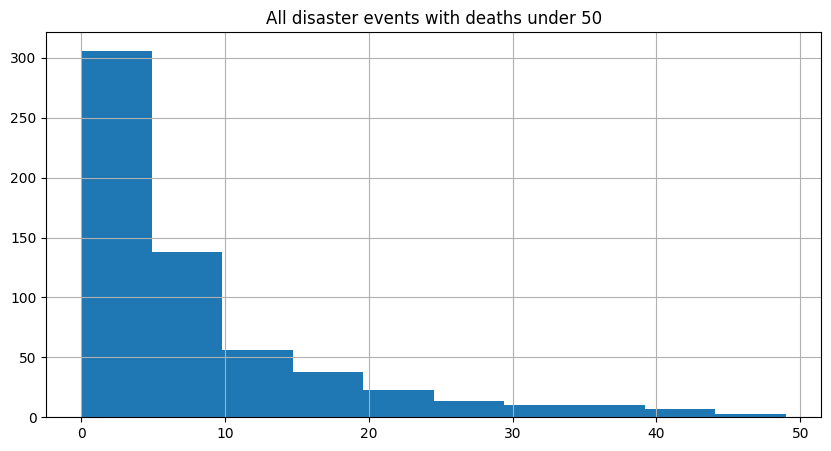

In [82]:
upper_bound = 50
disaster_data.deaths[disaster_data.deaths < upper_bound].hist()
plt.title(f"All disaster events with deaths under {upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [83]:
disaster_data.head(2)

,FID,id,resourcetype,title,description,startdate,enddate,lat,lon,evacuated,...,businesses_damaged,businesses_destroyed,farms_damaged,farms_destroyed,crops_destroyed,livestock_destroyed,government_assistance,regions,url,the_geom
0,disaster_events_impact_location.fid-2393c2e0_1...,3,Disaster Event,Industrial - Appin Mine Explosion,On 24 July 1979 an explosion occurred in the u...,7-24-1979,7-24-1979,-34.192211,150.786331,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,http://www.emknowledge.gov.au/resource/?id=3,POINT (-34.19221115 150.7863312)
1,disaster_events_impact_location.fid-2393c2e0_1...,9,Disaster Event,Transport - Trawalla Train and Truck Collision,"On 28 April 2006, a V/Line passenger train bou...",4-28-2006,4-28-2006,-37.436260,143.469421,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=9,POINT (-37.43626022 143.4694214)


We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [84]:
disaster_data.regions.value_counts()

regions
New South Wales                                                                                                                                     181
Victoria                                                                                                                                            132
Queensland                                                                                                                                          122
Western Australia                                                                                                                                    51
Tasmania                                                                                                                                             46
South Australia                                                                                                                                      40
Outside Australia                                                               

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<Axes: xlabel='regions'>

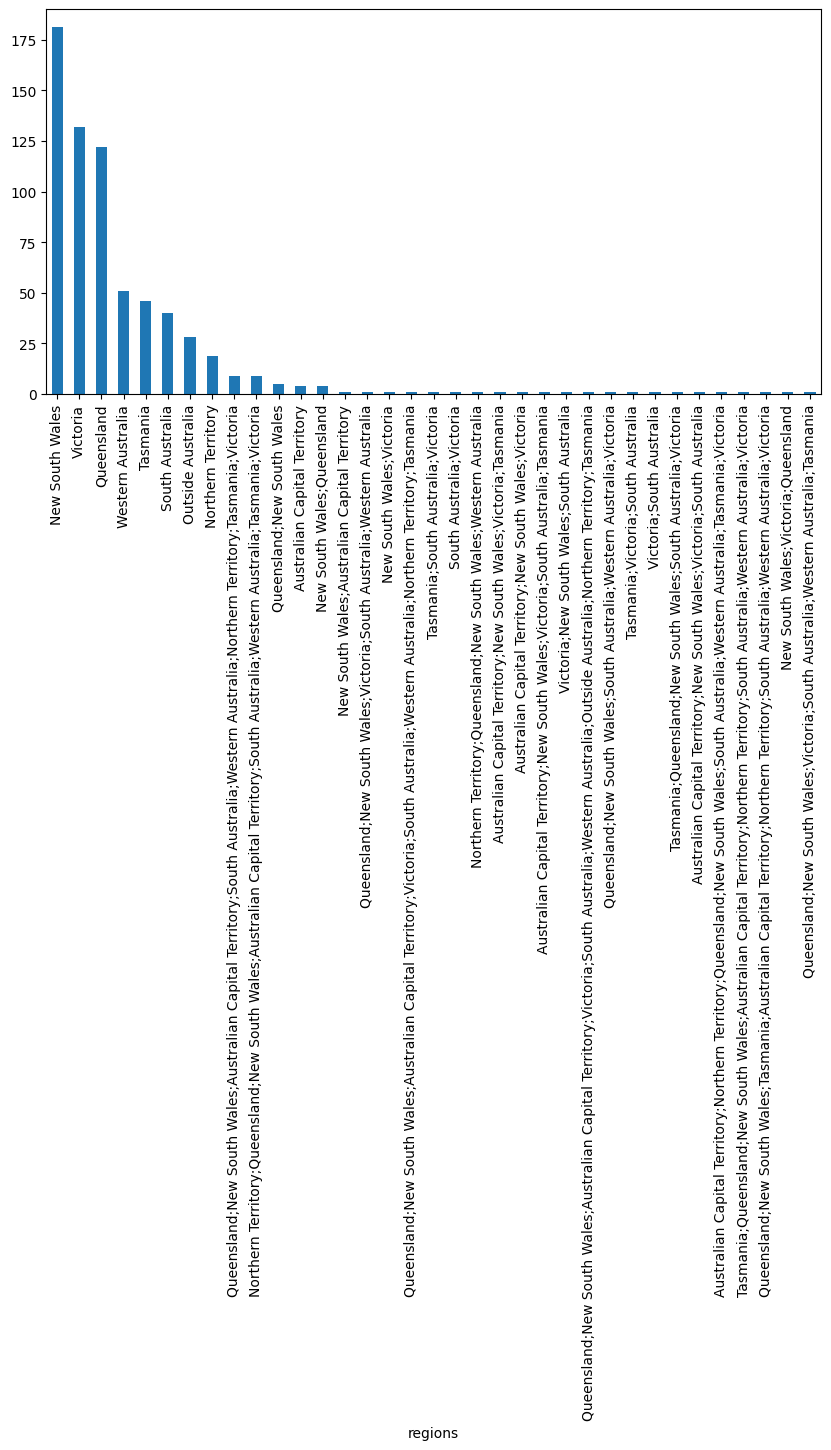

In [85]:
ddvc = disaster_data.regions.value_counts() # This makes a series
ddvc.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

<Axes: xlabel='regions'>

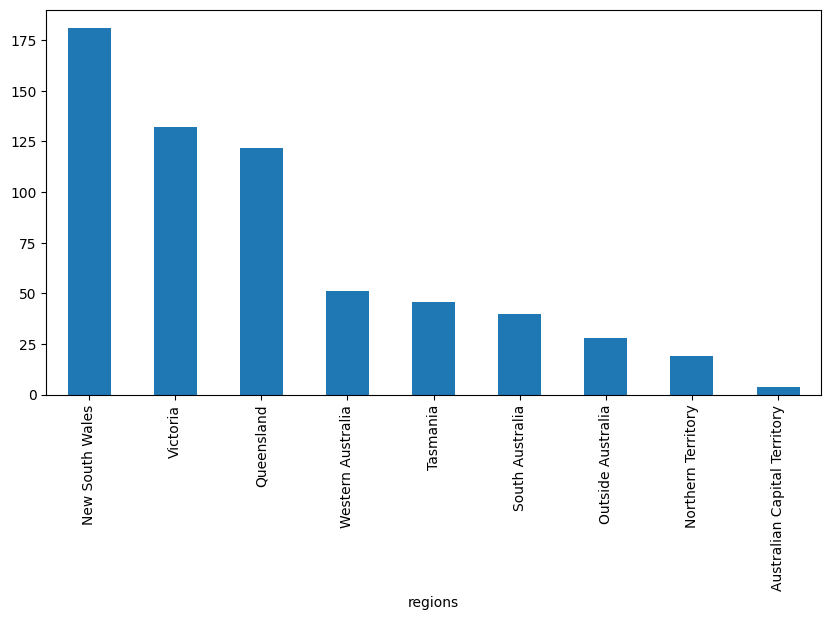

In [86]:
single_regions = disaster_data[disaster_data.regions.str.contains(";") == False]

ddvc = single_regions.regions.value_counts() # This makes a series
ddvc.plot(kind="bar")

This pattern keeps repeating itself:

<Axes: ylabel='regions'>

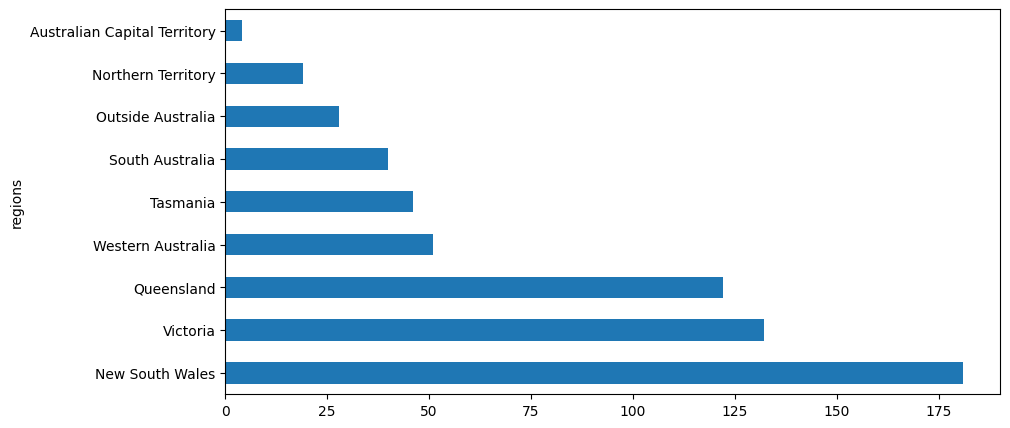

In [87]:
ddvc.plot(kind="barh")

<Axes: xlabel='regions'>

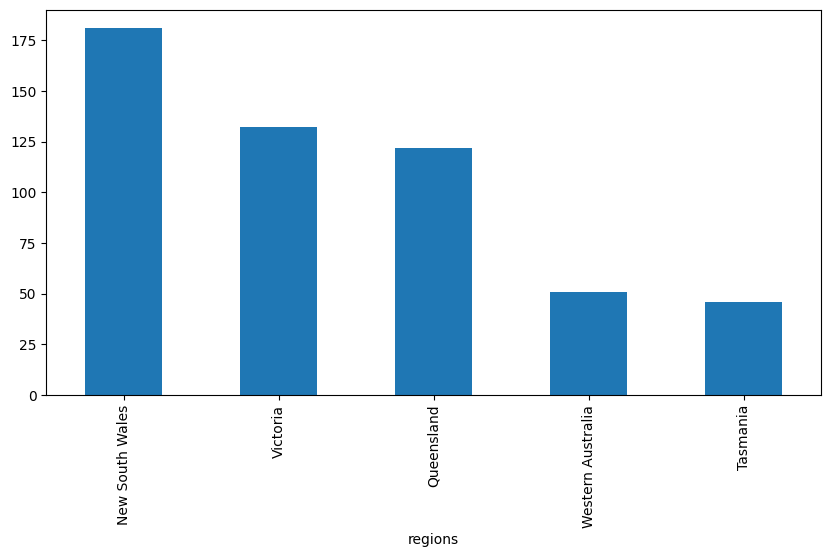

In [88]:
ddvc[ddvc > 40].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

C:\Users\rishi\AppData\Local\Temp\ipykernel_46764\1902757407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster_data.category[disaster_data.category.str.contains("Cyclone")] = "Cyclone"


<Axes: ylabel='category'>

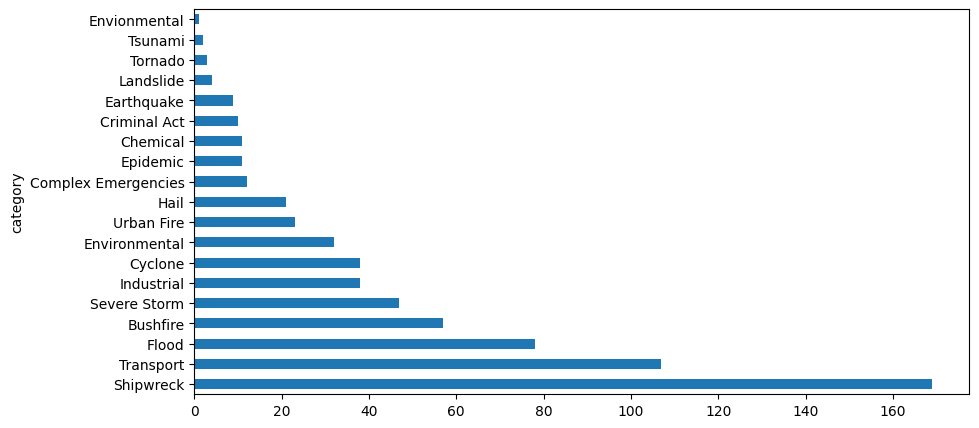

In [89]:
disaster_data["category"] = disaster_data.apply(lambda x: x.title[0:x.title.find(" -")],axis=1)
disaster_data.category[disaster_data.category.str.contains("Cyclone")] = "Cyclone"
ddvc = disaster_data.category.value_counts()
ddvc.plot(kind="barh")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [90]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


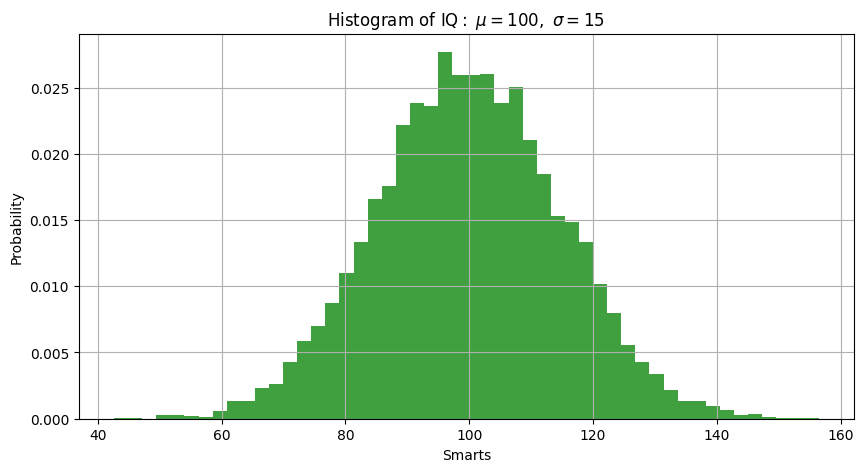

In [91]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<Axes: >

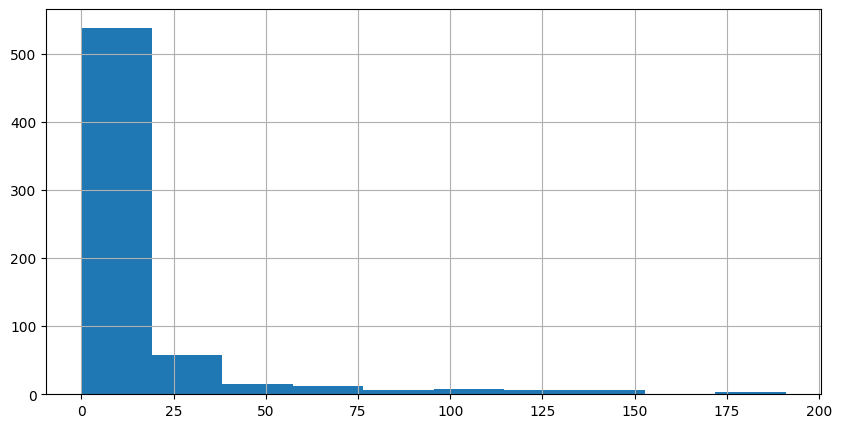

In [92]:
disaster_data.deaths[disaster_data.deaths < 200].hist()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

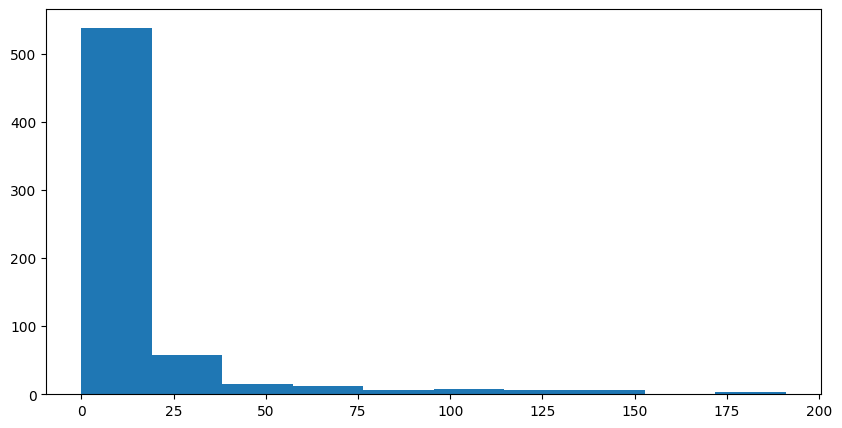

In [93]:
capped_deaths_data = disaster_data.deaths[disaster_data.deaths < 200]

plt.hist(capped_deaths_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

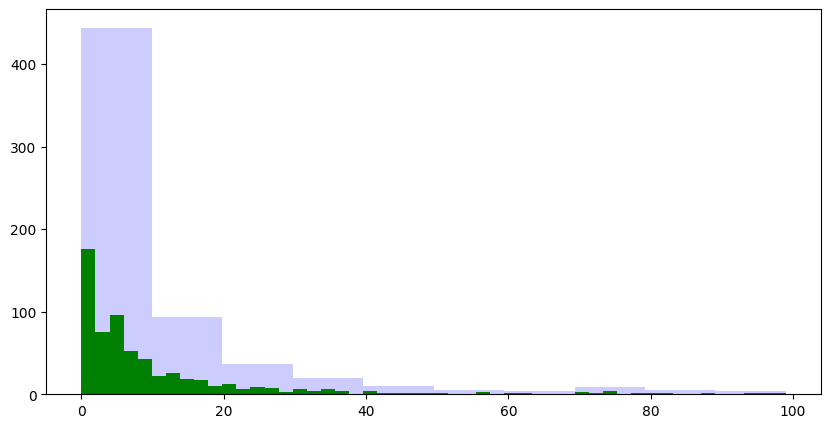

In [94]:
capped_deaths_data = disaster_data.deaths[disaster_data.deaths < 100]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_deaths_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_deaths_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

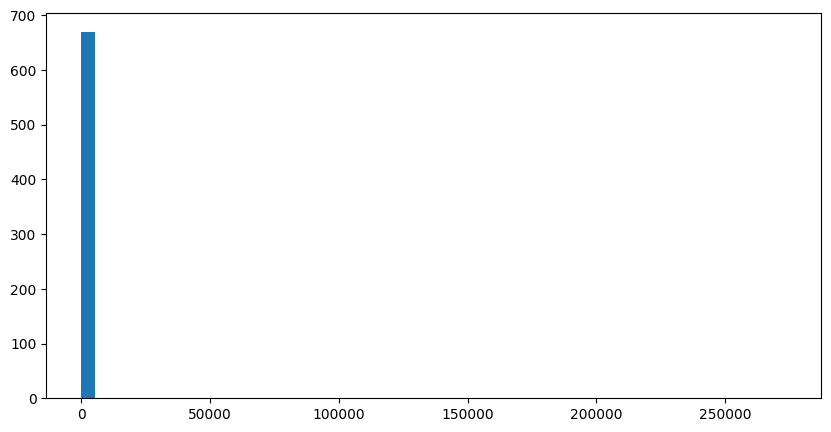

In [95]:
plt.hist(disaster_data.deaths, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

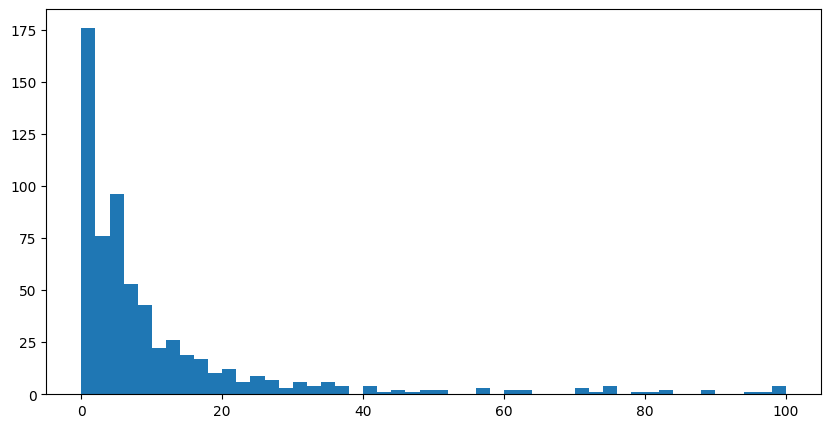

In [96]:
plt.hist(disaster_data.deaths, bins=50, range=(0, 100))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

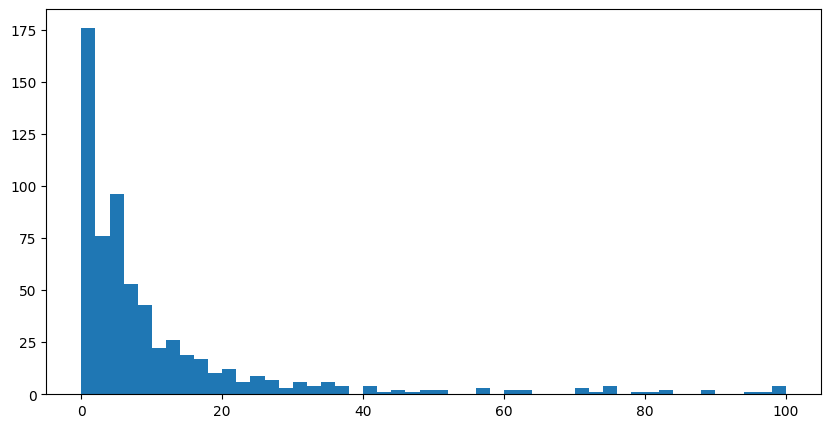

In [97]:
number_of_bins = 50
lower_bound = 0
upper_bound = 100
plt.hist(
    disaster_data.deaths,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

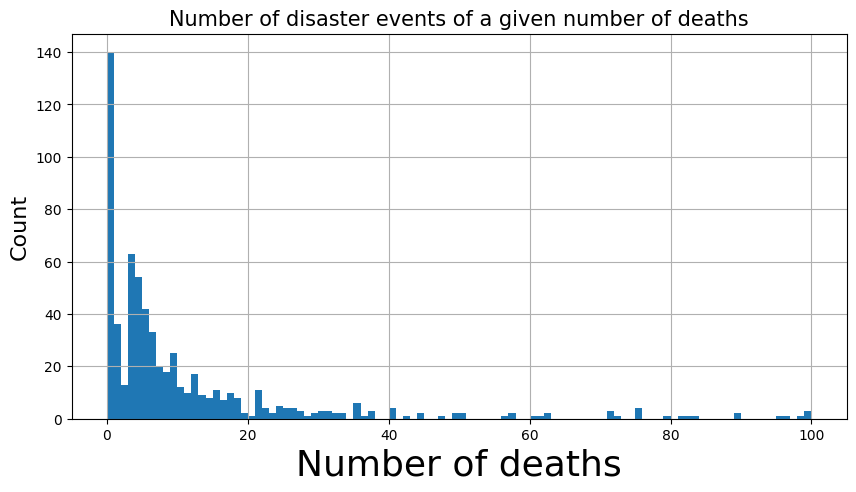

In [98]:
number_of_bins = 100
lower_bound = 0
upper_bound = 100

plt.hist(disaster_data.deaths, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of disaster events of a given number of deaths", fontsize=15)
plt.xlabel("Number of deaths", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()


We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [102]:
from datetime import datetime
disaster_data.startdate = disaster_data.startdate.str.replace("/", "-")
disaster_data.enddate = disaster_data.enddate.str.replace("/", "-")

disaster_data['startdate'] = pd.to_datetime(disaster_data.startdate, format ='mixed', dayfirst = False)
disaster_data['startdate'] = disaster_data['startdate'].dt.strftime('%Y-%m-%d')

disaster_data.head()

,FID,id,resourcetype,title,description,startdate,enddate,lat,lon,evacuated,...,businesses_destroyed,farms_damaged,farms_destroyed,crops_destroyed,livestock_destroyed,government_assistance,regions,url,the_geom,category
0,disaster_events_impact_location.fid-2393c2e0_1...,3,Disaster Event,Industrial - Appin Mine Explosion,On 24 July 1979 an explosion occurred in the u...,1979-07-24,7-24-1979,-34.192211,150.786331,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,http://www.emknowledge.gov.au/resource/?id=3,POINT (-34.19221115 150.7863312),Industrial
1,disaster_events_impact_location.fid-2393c2e0_1...,9,Disaster Event,Transport - Trawalla Train and Truck Collision,"On 28 April 2006, a V/Line passenger train bou...",2006-04-28,4-28-2006,-37.436260,143.469421,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=9,POINT (-37.43626022 143.4694214),Transport
2,disaster_events_impact_location.fid-2393c2e0_1...,22,Disaster Event,Bushfire - Great Divide Complex,Victoria experienced a very adverse fire seaso...,2006-12-01,2-07-2007,-36.718010,147.145218,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=22,POINT (-36.71800995 147.1452179),Bushfire
3,disaster_events_impact_location.fid-2393c2e0_1...,24,Disaster Event,Severe Storm - South-East Queensland and North...,"In early October 2007, severe storms brought a...",2007-10-07,10-12-2007,-28.805798,153.276871,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Queensland,http://www.emknowledge.gov.au/resource/?id=24,POINT (-28.80579758 153.2768707),Severe Storm
4,disaster_events_impact_location.fid-2393c2e0_1...,38,Disaster Event,Shipwreck - Vixen,The schooner Vixen was on voyage from Brisbane...,1847-01-09,01-09-1847,-29.334297,153.369141,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Queensland,http://www.emknowledge.gov.au/resource/?id=38,POINT (-29.33429718 153.3691406),Shipwreck


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [103]:
first_date = disaster_data.startdate.min()
last_date = disaster_data.startdate.max()
f"range is: {first_date} to {last_date}"


'range is: 1753-01-01 to 2014-03-22'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [104]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(disaster_data.startdate.min(), date_format_pattern)
latest_date = datetime.strftime(disaster_data.startdate.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

Which means that we can put those values into our graph title:

NameError: name 'earliest_date' is not defined

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

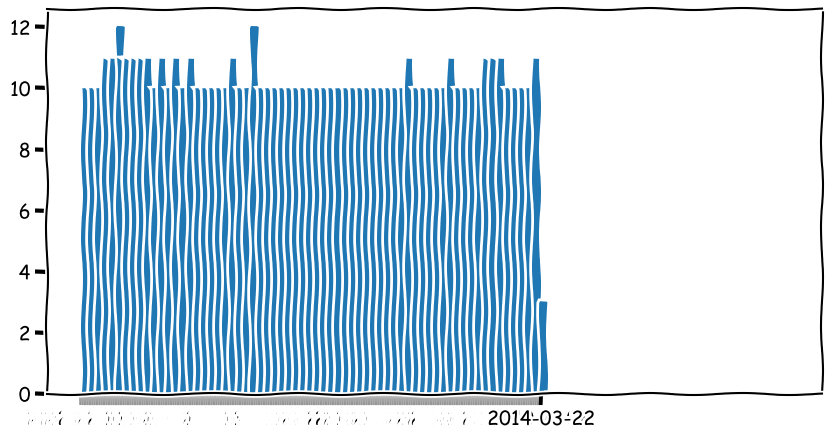

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    disaster_data["startdate"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of events of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

In [ ]:
income = disaster_data[["startdate"]].groupby(disaster_data.startdate.dt.year).sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = disaster_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [105]:
ss["day_from_lambda"] = ss.apply(lambda x: x.datetime.day, axis=1)
ss.head(2)


AttributeError: 'str' object has no attribute 'datetime'

Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.startdate.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


AttributeError: 'str' object has no attribute 'day'

Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function,nice_day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,46,16238,1,1,1,Friday


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

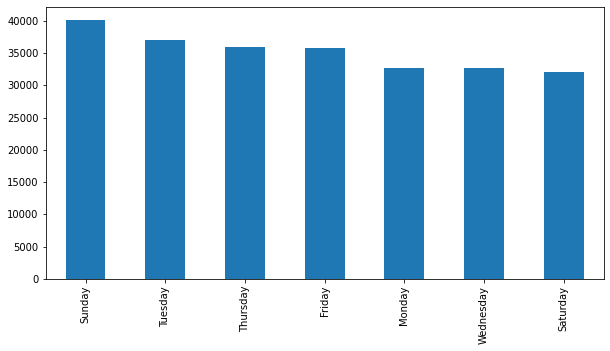

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    NSW_canonical = "New South Wales"
    VIC_canonical = "Victoria"
    WA_canonical = "Western Australia"

    # dictionary of input:output pairs
    folds = {
        "New South Wales": NSW_canonical,
        "New South  Wales": NSW_canonical,
        "New South wales": NSW_canonical,
        "Victoria": VIC_canonical,
        "victoria": VIC_canonical,
        "Western Australia": WA_canonical,
        "Western australia": WA_canonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New South Wales"))
print(fold("Victoria"))
print(fold("Western Australia"))


New South Wales
Victoria
Western Australia


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_